# **Proyek I : Membuat Model NLP dengan TensorFlow - Dicoding x Kampus Merdeka**

# **DATA DIRI**

* Nama      : Karlina Surya Witanto
* ID        : M014V6051
* PT        : Universitas Udayana
* Email     : gabriella.linatan@gmail.com
* Email SIB : m014v6051@dicoding.org

# **1. Import Library & Import Dataset**

Sumber Dataset : 
*   https://www.kaggle.com/kishanyadav/inshort-news?select=inshort_news_data-2.csv
*   https://www.kaggle.com/kishanyadav/inshort-news?select=inshort_news_data-3.csv




Di bawah ini merupakan perintah untuk import dataset dari Google Drive

In [25]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Import Library yang dibutuhkan

In [26]:
# Import Library yang akan digunakan

import pandas as pd
import nltk, os, re, string
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense, Embedding, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Import dataset yang akan digunakan. Dataset ini memiliki 3 kolom nama yaitu, news_headline, news_article, and news_category. Dataset ini juga mengandung 7 kategori berita yaitu technology,sports,politics,entertainment,world,automobile, dan science.

In [27]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/inshort_news_data-2.csv')
dataframe.head(11)

,Unnamed: 0,news_headline,news_article,news_category
0,0,Porn star jokes she could post nudes on Insta ...,Porn star Kendra Sunderland's Instagram accoun...,technology
1,1,Satellite pics show remains of SpaceX's rocket...,Satellite images showed the remains of Elon Mu...,technology
2,2,Not in favour of recommending such games: Top ...,National Commission for Protection of Child Ri...,technology
3,3,Researchers develop first AI tool to detect CO...,A team of researchers from the University of V...,technology
4,4,Virgin Galactic's test space flight cut short ...,Richard Branson's space tourism company Virgin...,technology
5,5,"Apple shuts Music Memos app, asks users to exp...",Apple has announced that it's discontinuing it...,technology
6,6,28% Indians hide real identities on social med...,Global cybersecurity firm Kaspersky in its rep...,technology
7,7,"Malware campaign adding extensions in Chrome, ...","Google Chrome, Firefox and other browsers are ...",technology
8,8,Zoom Founder Eric Yuan named TIME's 2020 Busin...,Zoom Founder Eric Yuan has been named TIME's 2...,technology
9,9,Twitter acquires screen-sharing social app Squad,Twitter has acquired the screen-sharing social...,technology


In [28]:
dataframe.news_category.value_counts()

science          225
sports           225
technology       225
politics         225
world            223
entertainment    222
automobile       218
Name: news_category, dtype: int64

In [29]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/inshort_news_data-3.csv')
dataframe.head(11)

,Unnamed: 0,news_headline,news_article,news_category
0,0,Ronaldo becomes first person to reach 25 crore...,Juventus star forward Cristiano Ronaldo has be...,technology
1,1,Julian Assange can't be extradited to US due t...,A British judge on Monday rejected the US' req...,technology
2,2,When did billionaire Jack Ma criticise Chinese...,Billionaire Jack Ma criticised Chinese regulat...,technology
3,3,Jack Ma suspected to be missing for 2 months a...,Chinese billionaire and Alibaba Co-Founder Jac...,technology
4,4,"Slack down for many users worldwide, messages ...",Several Slack users from across the world repo...,technology
5,5,S'pore police to be able to access contact tra...,Singapore police will be able to use data obta...,technology
6,6,Reliance to move Punjab and Haryana HC to stop...,Mukesh Ambani-led Reliance Industries Limited ...,technology
7,7,PHDCCI welcomes BSNL's move to allow indigenou...,The PHD Chamber of Commerce and Industry (PHDC...,technology
8,8,US' Massachusetts to require all new cars sold...,The US State of Massachusetts has mandated all...,technology
9,9,Chinese e-comm firm faces labour probe after e...,Chinese e-commerce platform Pinduoduo is facin...,technology


In [30]:
dataframe.news_category.value_counts()

world            225
politics         225
technology       224
science          223
sports           223
entertainment    220
automobile       220
Name: news_category, dtype: int64

Melalui hasil count data diatas, jumlah data antar kategorinya berbeda, perbedaan data ini akan mempengaruhi hasil klasifikasi, karena datanya tidak balance. Oleh karena itu, saya melakukan drop data secara manual dan menjadikan jumlah data antar kategori bernilai sama. Jumlah data antar kategori yaitu 430 berita. Berikut data yang sudah saya perbaharui. Sehingga total jumlah data yaitu 3.010 data.

In [31]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/databarunlp.csv')
dataframe.head(11)

,Unnamed: 0,news_headline,news_article,news_category
0,0,K'taka govt won't ask IT firms to open offices...,Karnataka Deputy CM CN Ashwathnarayan said the...,technology
1,1,Hyundai to buy 80% stake in SoftBank's robot m...,Hyundai Motor will buy an 80% stake in Boston ...,technology
2,2,Facebook traces 'OceanLotus' hackers to IT fir...,Facebook has traced hacking group 'OceanLotus'...,technology
3,3,Lawsuit against Trump's social media executive...,The lawsuit filed by the CDT group asking to d...,technology
4,4,Most Apple employees won't return to office un...,Apple CEO Tim Cook in a virtual meeting with e...,technology
5,5,Oracle moves headquarters from Silicon Valley ...,Oracle has moved its headquarters from Silicon...,technology
6,6,Apple sued by app store Cydia over alleged App...,"Apple has been sued in the US by Cydia, an app...",technology
7,7,ED arrests Gujarat cryptocurrency trader in ₹1...,The Enforcement Directorate (ED) on Friday arr...,technology
8,8,Apple building its own cellular modem for futu...,Apple SVP of Hardware Technology Johny Srouji ...,technology
9,9,Staff doesn't need to be vaccinated before ret...,Facebook CEO Mark Zuckerberg told employees du...,technology


In [32]:
#menghitung jumlah data yang terbaru

dataframe.news_category.value_counts()

science          430
world            430
sports           430
entertainment    430
automobile       430
technology       430
politics         430
Name: news_category, dtype: int64

Di bawah ini merupakan perintah untuk menghapus kolom yang tidak digunakan.

In [33]:
dataframe = dataframe.drop(columns = ['Unnamed: 0'])
dataframe.head(11)

,news_headline,news_article,news_category
0,K'taka govt won't ask IT firms to open offices...,Karnataka Deputy CM CN Ashwathnarayan said the...,technology
1,Hyundai to buy 80% stake in SoftBank's robot m...,Hyundai Motor will buy an 80% stake in Boston ...,technology
2,Facebook traces 'OceanLotus' hackers to IT fir...,Facebook has traced hacking group 'OceanLotus'...,technology
3,Lawsuit against Trump's social media executive...,The lawsuit filed by the CDT group asking to d...,technology
4,Most Apple employees won't return to office un...,Apple CEO Tim Cook in a virtual meeting with e...,technology
5,Oracle moves headquarters from Silicon Valley ...,Oracle has moved its headquarters from Silicon...,technology
6,Apple sued by app store Cydia over alleged App...,"Apple has been sued in the US by Cydia, an app...",technology
7,ED arrests Gujarat cryptocurrency trader in ₹1...,The Enforcement Directorate (ED) on Friday arr...,technology
8,Apple building its own cellular modem for futu...,Apple SVP of Hardware Technology Johny Srouji ...,technology
9,Staff doesn't need to be vaccinated before ret...,Facebook CEO Mark Zuckerberg told employees du...,technology


In [34]:
# Total data

dataframe.shape

(3010, 3)

Total data yang disajikan yaitu 3.010 data yang terdiri dari 3 kolom

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


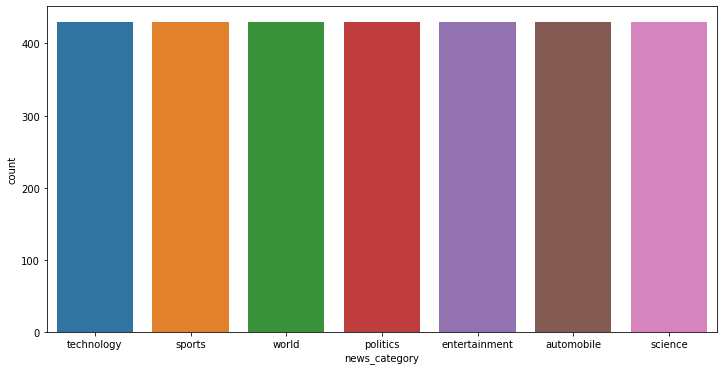

In [35]:
plt.figure(figsize = (12, 6))
sns.countplot(dataframe.news_category)

Dapat kita lihat bahwa persebaran data memiliki nilai yang sama antar kategori berita, yaitu 430 data per kategori

# **2. Data Pre-Processing**

Tahap pre-processing atau praproses data merupakan proses untuk mempersiapkan data mentah sebelum dilakukan proses lain. Pada umumnya, praproses data dilakukan dengan cara mengeliminasi data yang tidak sesuai atau mengubah data menjadi bentuk yang lebih mudah diproses oleh sistem. Praproses sangat penting dalam klasifikasi data, terutama untuk media sosial yang sebagian besar berisi kata-kata atau kalimat yang tidak formal dan tidak terstruktur serta memiliki noise yang besar. Berikut merupakan tahap-tahap pre-processing data yang saya lakukan :

**Lowercasing**

In [36]:
dataframe.news_headline = dataframe.news_headline.apply(lambda x: x.lower())
dataframe.news_article = dataframe.news_article.apply(lambda x: x.lower())

**Data Cleansing**

In [37]:
#menghapus tanda baca
def cleaner(data):
    return(data.translate(str.maketrans('','', string.punctuation)))
    dataframe.news_headline = dataframe.news_headline.apply(lambda x: cleaner(x))
    dataframe.news_article = dataframe.news_article.apply(lambda x: lem(x))

#menghapus angka
def rem_numbers(data):
    return re.sub('[0-9]+','',data)
    dataframe['news_headline'].apply(rem_numbers)
    dataframe['news_article'].apply(rem_numbers)

**Lemmatization**

In [38]:
lemmatizer = WordNetLemmatizer()

def lem(data):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(data.split())]))
    dataframe.news_headline = dataframe.news_headline.apply(lambda x: lem(x))
    dataframe.news_article = dataframe.news_article.apply(lambda x: lem(x))

**Stopword Removal**

In [39]:
stwrds = stopwords.words('english')
def stopword(data):
    return(' '.join([w for w in data.split() if w not in stwrds ]))
    dataframe.news_headline = dataframe.news_headline.apply(lambda x: stopword(x))
    dataframe.news_article = dataframe.news_article.apply(lambda x: lem(x))

In [40]:
dataframe.head(11)

,news_headline,news_article,news_category
0,k'taka govt won't ask it firms to open offices...,karnataka deputy cm cn ashwathnarayan said the...,technology
1,hyundai to buy 80% stake in softbank's robot m...,hyundai motor will buy an 80% stake in boston ...,technology
2,facebook traces 'oceanlotus' hackers to it fir...,facebook has traced hacking group 'oceanlotus'...,technology
3,lawsuit against trump's social media executive...,the lawsuit filed by the cdt group asking to d...,technology
4,most apple employees won't return to office un...,apple ceo tim cook in a virtual meeting with e...,technology
5,oracle moves headquarters from silicon valley ...,oracle has moved its headquarters from silicon...,technology
6,apple sued by app store cydia over alleged app...,"apple has been sued in the us by cydia, an app...",technology
7,ed arrests gujarat cryptocurrency trader in ₹1...,the enforcement directorate (ed) on friday arr...,technology
8,apple building its own cellular modem for futu...,apple svp of hardware technology johny srouji ...,technology
9,staff doesn't need to be vaccinated before ret...,facebook ceo mark zuckerberg told employees du...,technology


Proses selanjutnya yaitu proses One-Hot Encoding. One-Hot Encoding adalah teknik yang merubah setiap nilai di dalam kolom menjadi kolom baru dan mengisinya dengan nilai biner yaitu 0 dan 1. Pada case ini saya menggunakan library dari pandas untuk melakukan proses ini.

In [41]:
category = pd.get_dummies(dataframe['news_category'])
dataframe = pd.concat([dataframe, category], axis=1)
dataframe = dataframe.drop('news_category', axis=1)
dataframe.head()

,news_headline,news_article,automobile,entertainment,politics,science,sports,technology,world
0,k'taka govt won't ask it firms to open offices...,karnataka deputy cm cn ashwathnarayan said the...,0,0,0,0,0,1,0
1,hyundai to buy 80% stake in softbank's robot m...,hyundai motor will buy an 80% stake in boston ...,0,0,0,0,0,1,0
2,facebook traces 'oceanlotus' hackers to it fir...,facebook has traced hacking group 'oceanlotus'...,0,0,0,0,0,1,0
3,lawsuit against trump's social media executive...,the lawsuit filed by the cdt group asking to d...,0,0,0,0,0,1,0
4,most apple employees won't return to office un...,apple ceo tim cook in a virtual meeting with e...,0,0,0,0,0,1,0


Selanjutnya saya mengubah dataframe tersebut ke dalam Numpy Array, hal ini dilakukan agar data dapat diproses saat membangun model LSTM.

In [42]:
X = dataframe['news_headline'].values + '' + dataframe['news_article'].values
y = dataframe[['automobile', 'entertainment', 'politics', 'science', 'sports', 'technology', 'world']].values

y

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Proses selanjutnya yaitu melakukan split data, yaitu 20% untuk validation dataset.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
print(y_train.shape)
print(y_test.shape)

(2408, 7)
(602, 7)


Dapat dilihat dari hasil diatas, validation dataset sudah 20% dari total data, yaitu 602 data dengan 7 kategori berita.

**Tokenizing**

Tokenizing adalah operasi memisahkan teks menjadi potongan-potongan berupa token, bisa berupa potongan huruf, kata, atau kalimat, sebelum dianalisis lebih lanjut.

In [45]:
tokenizer = Tokenizer(num_words=10000, oov_token='n')

tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)
padded_train = pad_sequences(sequence_train)
padded_test = pad_sequences(sequence_test)

# **3. Fungsi Callbacks**

Inisialisasi Fungsi Callbacks yang digunakan untuk menghentikan training data ketika akurasi mencapai diatas 97% dan validation set sudah mencapai diatas 90%.

In [51]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97 and logs.get('val_accuracy')>0.90):
      self.model.stop_training = True
      print("\nAkurasi training set sudah mencapai > 97% dan validation set sudah mencapai > 90%, hentikan proses training!")
callbacks = myCallback()

# **4. Model LSTM**

LSTM merupakan salah satu jenis dari Recurrent Neural Network (RNN) dimana dilakukan modifikasi pada RNN dengan menambahkan memory cell yang dapat menyimpan informasi untuk jangka waktu yang lama. LSTM diusulkan sebagai solusi untuk mengatasi terjadinya vanishing gradient pada RNN saat memproses data sequential yang panjang.

Membuat model sequential dan melakukan compile model dengan Adam optimizer dan loss function categorical-crossentropy (hasil klasifikasi lebih dari dua klasifikasi)

In [52]:
model = tf.keras.Sequential([
          Embedding(input_dim=10000, output_dim=128),
          LSTM(128),
          Flatten(),
          Dropout(0.5),
          Dense(128, activation='relu'),
          Dense(64, activation='relu'),
          Dense(7, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 7)                

Eksekusi LSTM Model

In [53]:
import math

batch_size=64
train_size=2408
validation_size=602

#menghitung nilai step per epoch dan val step
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / batch_size))
steps_per_epoch = compute_steps_per_epoch(train_size)
val_steps = compute_steps_per_epoch(validation_size)

nlp_model = model.fit(
    padded_train,
    y_train,
    epochs=15,
    steps_per_epoch=steps_per_epoch,
    validation_steps=val_steps,
    validation_data=(padded_test, y_test),
    verbose=1, 
    callbacks=[callbacks])

Epoch 1/15
38/38 [==============================] - 12s 254ms/step - loss: 1.9126 - accuracy: 0.2085 - val_loss: 1.6936 - val_accuracy: 0.2259
Epoch 2/15
38/38 [==============================] - 9s 234ms/step - loss: 1.4068 - accuracy: 0.3588 - val_loss: 1.1271 - val_accuracy: 0.4867
Epoch 3/15
38/38 [==============================] - 9s 239ms/step - loss: 0.8352 - accuracy: 0.5918 - val_loss: 0.7579 - val_accuracy: 0.6711
Epoch 4/15
38/38 [==============================] - 9s 233ms/step - loss: 0.5880 - accuracy: 0.7438 - val_loss: 0.6588 - val_accuracy: 0.7741
Epoch 5/15
38/38 [==============================] - 9s 225ms/step - loss: 0.3432 - accuracy: 0.8771 - val_loss: 0.5066 - val_accuracy: 0.8704
Epoch 6/15
38/38 [==============================] - 9s 237ms/step - loss: 0.3233 - accuracy: 0.9086 - val_loss: 0.4974 - val_accuracy: 0.8721
Epoch 7/15
38/38 [==============================] - 9s 228ms/step - loss: 0.1399 - accuracy: 0.9581 - val_loss: 0.4807 - val_accuracy: 0.8854
Epoch

Dapat dilihat melalui proses diatas, model berhasil mencapai akurasi diatas 97% yaitu pada titik 97,18% dan validation set juga sudah mencapai diatas 90% yaitu pada titik 90,70% sehingga fungsi callbacks menghentikan training secara otomatis. Proses training ini memakan waktu selama 1 menit 22 detik.

# **5. Visualisasi Akurasi Data**

Menampilkan visualisasi data berdasarkan model yang sudah dibuat

**Plot Akurasi**

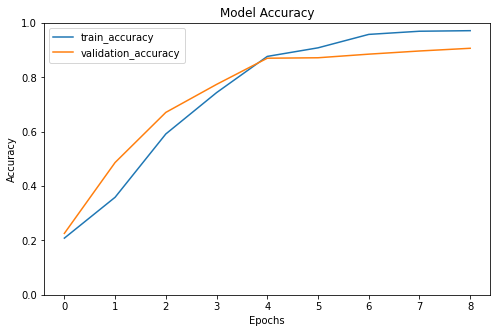

In [54]:
plt.figure(figsize=(8,5))
plt.plot(nlp_model.history['accuracy'], label='train_accuracy')
plt.plot(nlp_model.history['val_accuracy'], label='validation_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(ymin=0, ymax=1)
plt.show()

**Plot Loss**

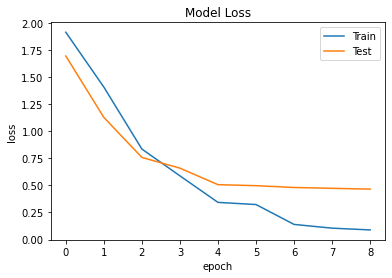

In [55]:
plt.plot(nlp_model.history['loss'])
plt.plot(nlp_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# **Kesimpulan**

Melalui proses evaluasi model diatas, LSTM model yang sudah saya bangun mampu memberikan akurasi 97,18% dan akurasi validation set 90,70% pada 3.010 data dengan 7 kategori berita, dengan parameter-parameter di bawah ini:

*   Unit LSTM : 128
*   Batch size : 64
*   Epoch : 15
*   Fungsi aktivasi : relu, softmax
*   Optimizer : Adam
*   Loss function : categorical-crossentropy
*   Verbose : 1
*   Dropout : 0.5

Penggunaan hyperparameter diatas saya lakukan secara repetitif sampai menemukan hyperparameter terbaik dan menghasilkan akurasi yang bagus. Selain itu pada iterasi epoch ke-9 model sudah mampu memberikan akurasi sebesar 97,18% dan akurasi validation set 90,70% sehingga proses training dihentikan oleh fungsi callbacks.